In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import FMTD_DB_DIR

from utils.functions import load_datasets_from_csv

from gaps.functions import find_series_gaps, flatten_series_gaps
from gaps.plots import show_gaps

from outliers.functions import find_outliers
from outliers.plots import show_outliers


from plot import show_series

In [2]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica', 'font.mono':'Helvetica'})
sns.set_context(rc={"font.size":11,"axes.titlesize":14,"axes.labelsize":12})

In [3]:
dts = load_datasets_from_csv(FMTD_DB_DIR).copy()

## 1.1 Preview

In [4]:
len(dts['external'].columns)

6

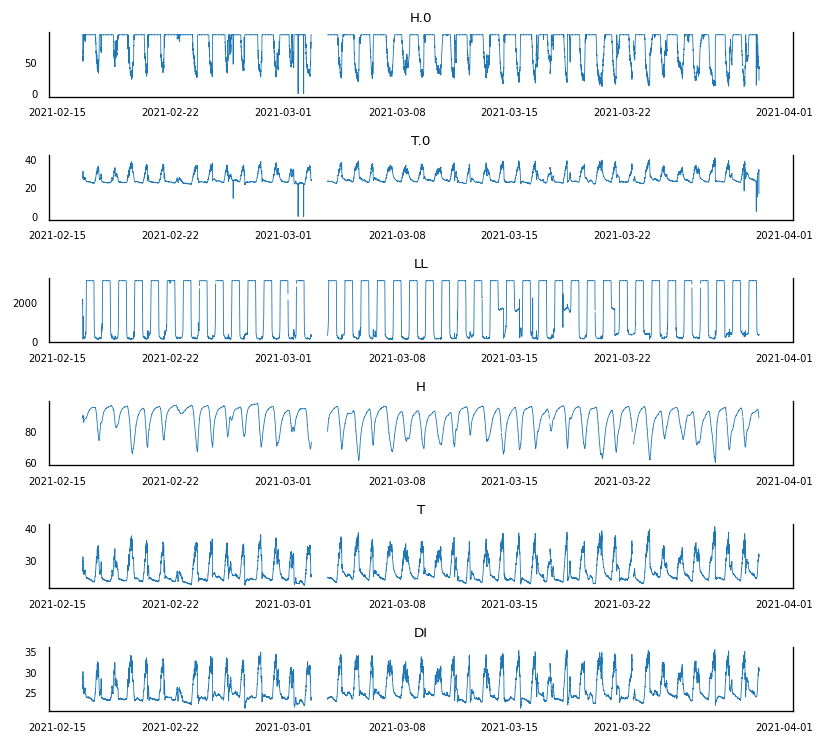

In [5]:
show_series(dts['external'])

## 1.2 Missing data

In [6]:
gaps = find_series_gaps(dts['external'])

In [7]:
l = list()
for gap in gaps['T']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      235
6        5
7        2
5        1
12       1
14       1
26       1
28       1
59       1
721      1
dtype: int64

In [8]:
l = list()
for gap in gaps['H']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      235
6        5
7        2
5        1
12       1
14       1
26       1
28       1
59       1
721      1
dtype: int64

In [9]:
l = list()
for gap in gaps['DI']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      235
6        5
7        2
5        1
12       1
14       1
26       1
28       1
59       1
721      1
dtype: int64

In [10]:
gaps_flat = flatten_series_gaps(gaps)

In [11]:
for key in gaps_flat:
    dts['external']['Hole'+key] = np.NaN
    dts['external'].loc[gaps_flat[key] , ('Hole'+key)] = 0

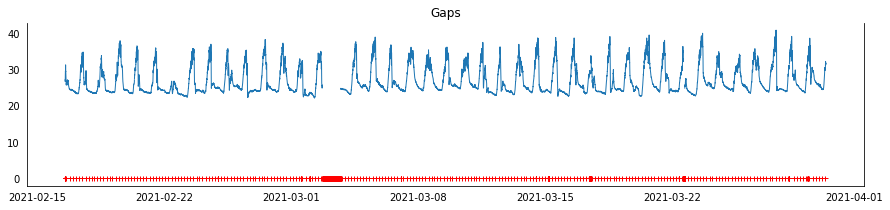

In [12]:
show_gaps(dts['external']['T'], dts['external']['HoleT'])

## 1.3 Outliers

In [13]:
fltr = find_outliers(dts['external']['T'], 0.005)
(fltr == True).sum()

290

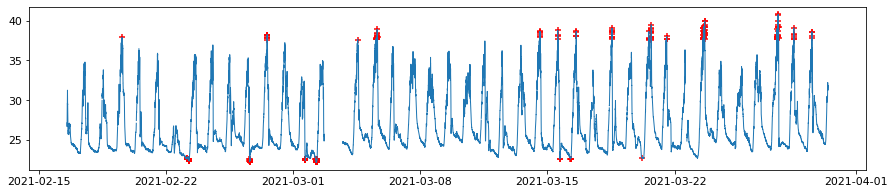

In [14]:
otlrs = dts['external'].loc[fltr, 'T']
show_outliers(dts['external']['T'], otlrs)

In [15]:
fltr = find_outliers(dts['external']['H'], 0.005)
(fltr == True).sum()

292

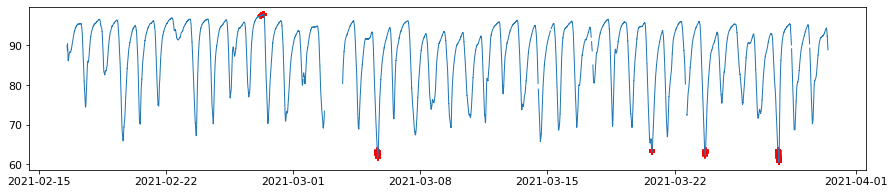

In [16]:
otlrs = dts['external'].loc[fltr, 'H']
show_outliers(dts['external']['H'], otlrs)

In [17]:
fltr = find_outliers(dts['external']['DI'], 0.005)
(fltr == True).sum()

292

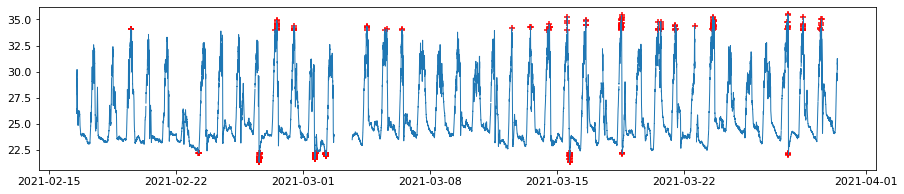

In [18]:
otlrs = dts['external'].loc[fltr, 'DI']
show_outliers(dts['external']['DI'], otlrs)